## Final Project Submission

Please fill out:
* Student name: Cecilia Ngunjiri
* Student pace: Part Time
* Scheduled project review date/time: 1st September 2024
* Instructor name: Samuel Karu
* Blog post URL:https://github.com/CessNgunjiri/dsc-phase-3-project


## Business Understanding

### Business Problem Statement

### Objective

To identify and mitigate customer churn for SyriaTel, a telecommunications company, by developing predictive models that can accurately forecast which customers are likely to stop doing business with the company in the near future.

 The goal is to build a classification model that can predict whether a customer will churn soon (binary outcome: 0 for "not churn" and 1 for "churn") based on historical data.

Customer churn, or the rate at which customers discontinue their subscription or service, is a critical issue for telecommunications companies. High churn rates can significantly impact revenue and operational efficiency. Understanding and predicting churn is crucial for implementing effective retention strategies and improving customer satisfaction.


Why Use Machine Learning?

For predicting customer churn at SyriaTel, machine learning is chosen over simpler forms of data analysis because:

Complex Relationships: Customer churn is influenced by multiple factors, such as usage patterns,total call minutes, total charges, , customer service interactions, and demographics(state). Simple statistical methods may not capture the complex, non-linear relationships between these features and churn.

Imbalanced Data: Churn datasets often have imbalanced classes (i.e., fewer churners than non-churners). Machine learning models like Random Forest and Decision Trees can handle imbalanced data better than traditional methods, which may perform poorly on minority classes.

Feature Interactions: Machine learning models can capture intricate interactions between features.

### Column Descriptions

State: The state where the customer is located.

Account Length: How long the customer has had their account.

Area Code: The area code of the customer’s phone number.

Phone Number: The customer's phone number.

International Plan: Whether the customer has an international calling plan (yes/no).

Voice Mail Plan: Whether the customer has a voicemail plan (yes/no).

Number Vmail Messages: The number of voicemail messages.

Total Day Minutes, Calls, Charge: Usage and cost information for daytime calls.

Total Eve Minutes, Calls, Charge: Usage and cost information for evening calls.

Total Night Minutes, Calls, Charge: Usage and cost information for night calls.

Total Intl Minutes, Calls, Charge: Usage and cost information for international calls.

Customer Service Calls: Number of calls the customer made to customer service.

Churn: Whether the customer has stopped using the service (yes/no).

## Data Understanding

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
# Load the dataset
data = pd.read_csv('telecom_churn.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
data.head() #load first 5 rows

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.tail() #load last 5 rows

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
data.describe() #summary statistics of the dataset

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
data.shape

(3333, 21)

In [7]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Missing Values

Checking for missing values in our dataset

In [9]:
data.isna().sum()
#there are no missing values in the dataset

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
data.duplicated().sum() #checking for duplicates

0

## Data Preparation and EDA

<AxesSubplot:xlabel='churn', ylabel='count'>

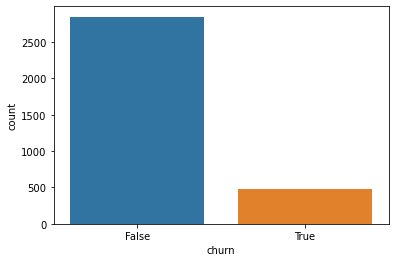

In [11]:
sns.countplot(data=data, x='churn')
#checking how many of our customers have churned ie true, and how many have not false

In [12]:
#encoding categorical data/columns into 0 to mean no/false and 1 to mean yes/true
data = data.replace(['yes', 'no'], ['1', '0'])
data[['international plan', 'voice mail plan']] = data[['international plan', 'voice mail plan']].astype(int).astype(int)

In [13]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<AxesSubplot:xlabel='international plan', ylabel='count'>

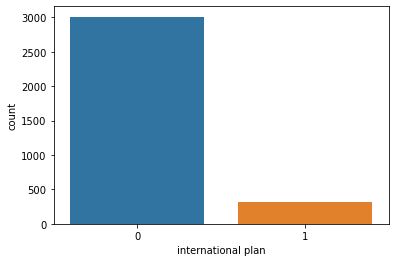

In [14]:
sns.countplot(data=data, x='international plan')
#This helps you quickly see how many customers have an international plan compared to those who don't.

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

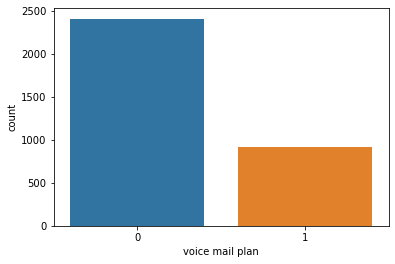

In [15]:
sns.countplot(data=data, x='voice mail plan')
#This helps you quickly see how many customers have an voice mail plan compared to those who don't.

In [16]:
#create two new columns in your dataset that aggregate total calls and total minutes for each customer. 
#print out summary statistics for both of these new columns
data['total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls'] + data['total intl calls'] + data['customer service calls']
data['total minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes'] + data['total intl minutes']
data['total charges'] = data['total day charge']+data['total night charge'] + data['total eve charge'] + data['total intl charge']

print(data['total calls'].describe(), data['total minutes'].describe(), data['total charges'],sep='\n\n')

count    3333.00000
mean      306.69997
std        34.44939
min       194.00000
25%       284.00000
50%       307.00000
75%       330.00000
max       418.00000
Name: total calls, dtype: float64

count    3333.000000
mean      591.864776
std        89.954251
min       284.300000
25%       531.500000
50%       593.600000
75%       652.400000
max       885.000000
Name: total minutes, dtype: float64

0       75.56
1       59.24
2       62.29
3       66.80
4       52.09
        ...  
3328    60.10
3329    63.53
3330    67.74
3331    57.53
3332    77.01
Name: total charges, Length: 3333, dtype: float64


### Checking for outliers

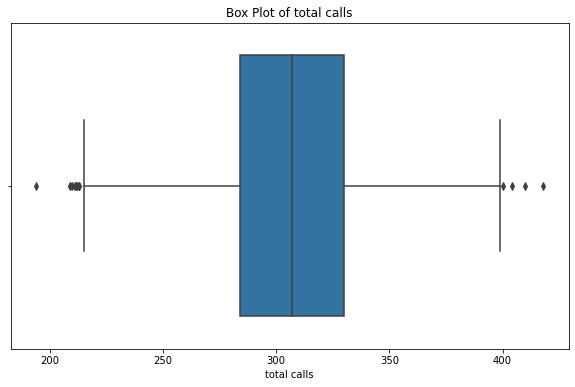

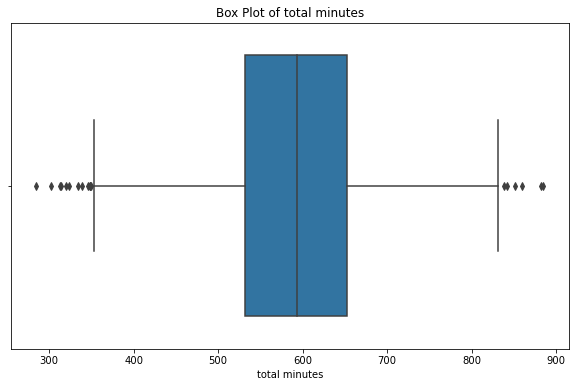

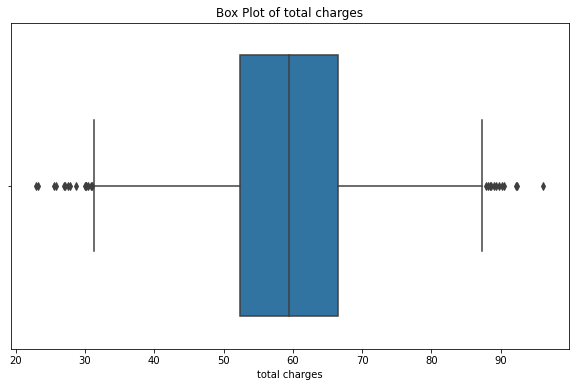

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting box plots for numerical features
numerical_features = ['total calls', 'total minutes','total charges']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


### EDA

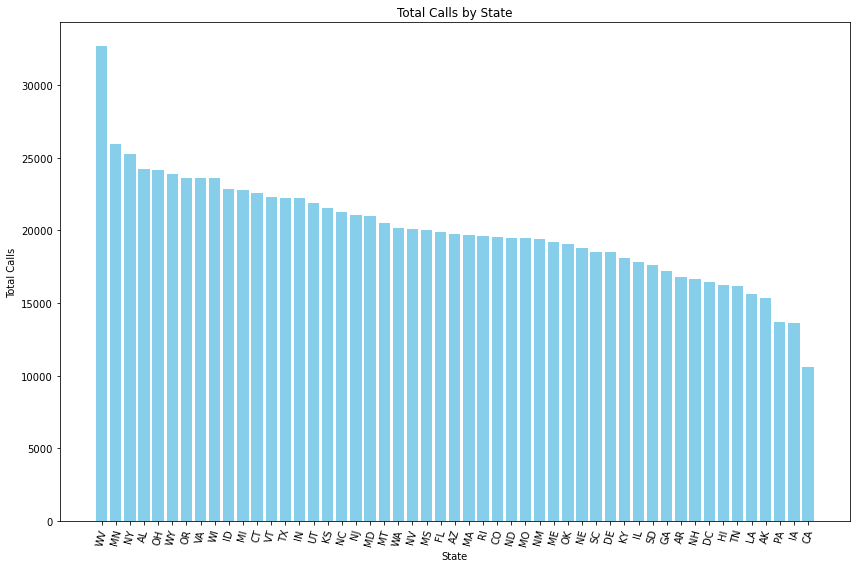

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping and sorting data 
calls_by_state = data.groupby('state')['total calls'].sum().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8)) 
plt.bar(calls_by_state.index, calls_by_state.values, color='skyblue')
plt.xlabel('State')  # Label for x-axis
plt.ylabel('Total Calls')  # Label for y-axis
plt.title('Total Calls by State')  # Title of the graph
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()

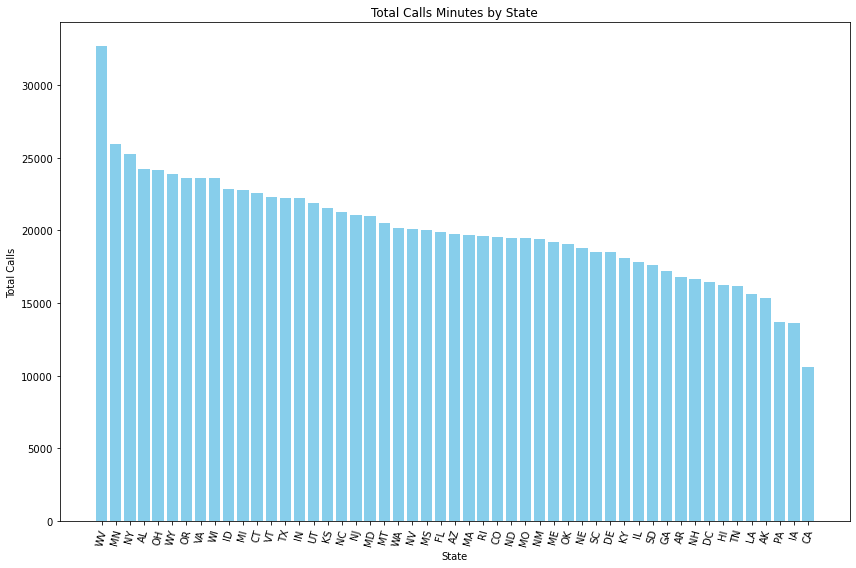

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping and sorting data 
minutes_by_state = data.groupby('state')['total minutes'].sum().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8)) 
plt.bar(calls_by_state.index, calls_by_state.values, color='skyblue')
plt.xlabel('State')  # Label for x-axis
plt.ylabel('Total Calls')  # Label for y-axis
plt.title('Total Calls Minutes by State')  # Title of the graph
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()


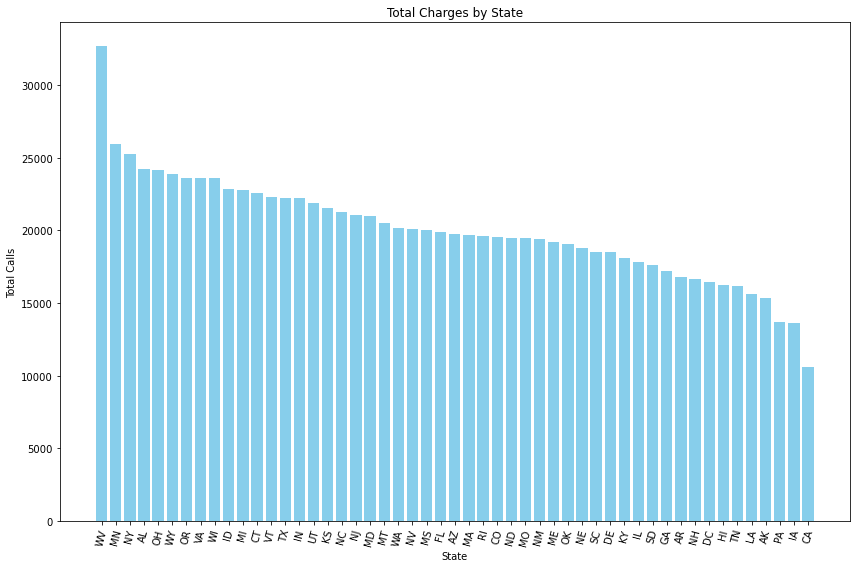

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping and sorting data 
minutes_by_state = data.groupby('state')['total charges'].sum().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8)) 
plt.bar(calls_by_state.index, calls_by_state.values, color='skyblue')
plt.xlabel('State')  # Label for x-axis
plt.ylabel('Total Calls')  # Label for y-axis
plt.title('Total Charges by State')  # Title of the graph
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()


As shown in the below displots, the dataset exhibits normal distribution.

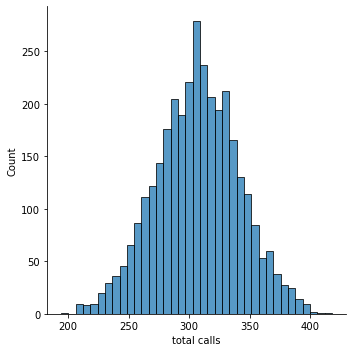

In [21]:
sns.displot(data=data, x=data['total calls'])
# visual summary of how customer call are distributed

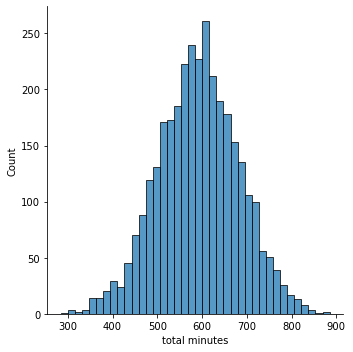

In [22]:
sns.displot(data=data, x=data['total minutes'])
# visual summary of how customer minutes  are distributed

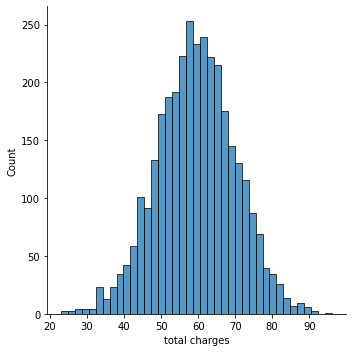

In [23]:
sns.displot(data=data, x=data['total charges'])
# visual summary of how charges  are distributed

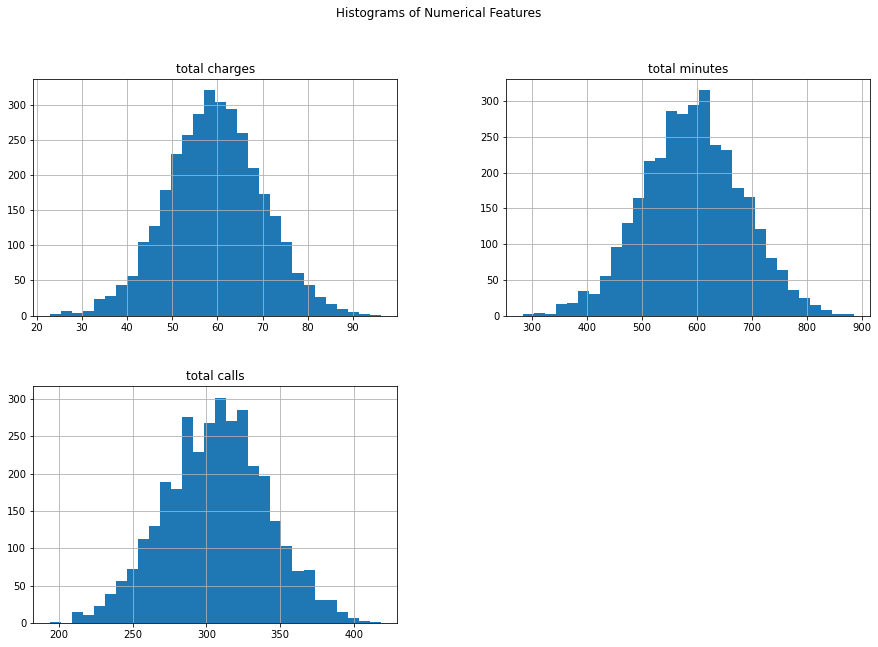

In [24]:
# Plotting distributions of numerical features
numerical_features = ['total charges','total minutes','total calls']

data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()
#visual summary of the distribution of various numerical features

In [25]:
#insights on customer behavior and usage patterns across different states
calls_by_state = data.groupby('state')['total calls'].sum().sort_values(ascending=False)
minutes_by_state = data.groupby('state')['total minutes'].sum().sort_values(ascending=False)
charges_by_state = data.groupby('state')['total charges'].sum().sort_values(ascending=False)


avg_minutes_by_state = data.groupby('state')['total minutes'].mean().sort_values(ascending=False)
avg_calls_by_state = data.groupby('state')['total calls'].mean().sort_values(ascending=False)
avg_calls_by_state = data.groupby('state')['total charges'].mean().sort_values(ascending=False)

records_by_state = data.groupby('state')['churn'].count().sort_values(ascending=False)

print(avg_minutes_by_state.head())
print(avg_calls_by_state.head())
print(records_by_state.head())


state
IN    619.323944
NJ    611.707353
KS    608.884286
MA    608.644615
TN    606.994340
Name: total minutes, dtype: float64
state
IN    62.787746
NJ    62.420000
MD    62.075714
KS    61.886286
SD    61.255500
Name: total charges, dtype: float64
state
WV    106
MN     84
NY     83
AL     80
OR     78
Name: churn, dtype: int64


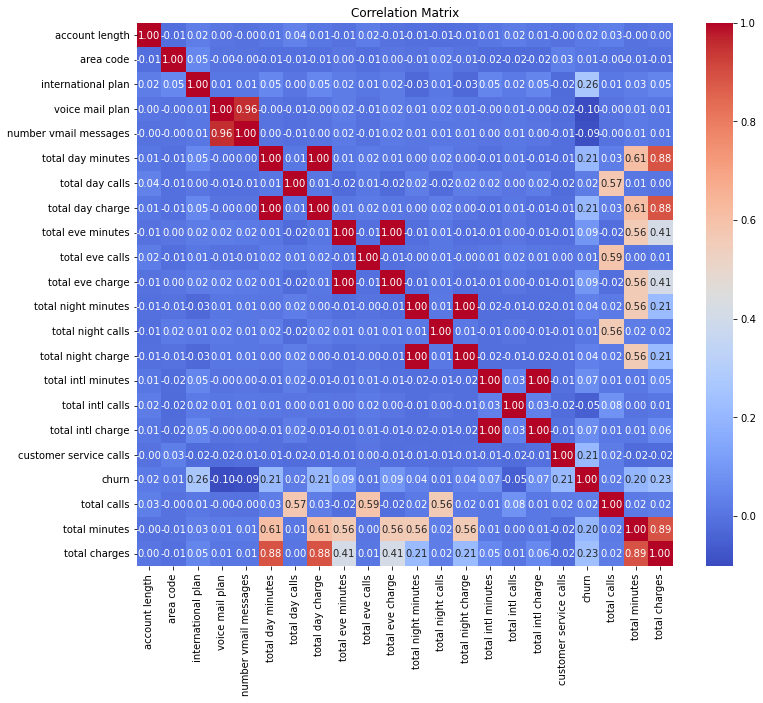

In [26]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering and Preprocessing

### Logistic Regression Model

Features used total calls, total minutes, total charges, international plan and voice mail plan

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = data[['total calls', 'total minutes','total charges', 'international plan', 'voice mail plan']]
y = data['churn']

# Separate numerical and categorical features
numerical_features = ['total calls', 'total minutes']
categorical_features = ['international plan', 'voice mail plan']

# Scale numerical features
scaler = StandardScaler()
X_num = X[numerical_features]
X_num_scaled = scaler.fit_transform(X_num)

# Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = X[categorical_features]
X_cat_encoded = encoder.fit_transform(X_cat)

# Combine scaled numerical features and encoded categorical features
X_processed = np.hstack([X_num_scaled, X_cat_encoded])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.98      0.92       566
        True       0.48      0.11      0.18       101

    accuracy                           0.85       667
   macro avg       0.67      0.54      0.55       667
weighted avg       0.80      0.85      0.80       667

Confusion Matrix:
 [[554  12]
 [ 90  11]]


Logistic Regression:

Precision for 'False': 0.86 (High precision in predicting non-churners)

Recall for 'True': 0.11 (Low recall in identifying churners)

F1-Score for 'True': 0.18 (Indicates poor performance for churn prediction)

Business Implication: The logistic regression model is good at identifying non-churners but misses a lot of churners. This could result in missed opportunities for retention strategies.

To help with this, we shall keep on adding more features to our model.

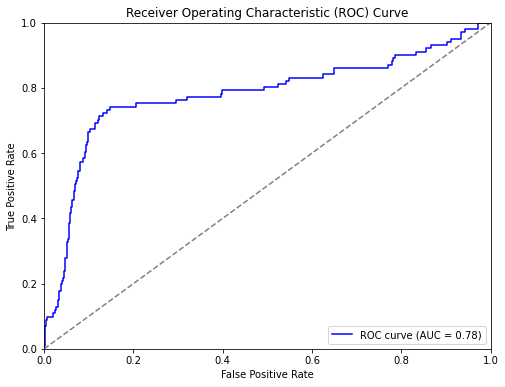

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Features used total calls, total minutes, total charges, international plan, voice mail plan and state

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = data[['total calls', 'total minutes','total charges', 'international plan', 'voice mail plan','state']]
y = data['churn']

# Separate numerical and categorical features
numerical_features = ['total calls', 'total minutes']
categorical_features = ['international plan', 'voice mail plan','state']

# Scale numerical features
scaler = StandardScaler()
X_num = X[numerical_features]
X_num_scaled = scaler.fit_transform(X_num)

# Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = X[categorical_features]
X_cat_encoded = encoder.fit_transform(X_cat)

# Combine scaled numerical features and encoded categorical features
X_processed = np.hstack([X_num_scaled, X_cat_encoded])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.98      0.92       566
        True       0.50      0.13      0.20       101

    accuracy                           0.85       667
   macro avg       0.68      0.55      0.56       667
weighted avg       0.81      0.85      0.81       667

Confusion Matrix:
 [[553  13]
 [ 88  13]]


The classification report for the model shows:

High Performance for Non-Churners (False): The model excels at predicting non-churners, with high precision (0.86) and recall (0.98), resulting in a strong F1-score of 0.92. This means it accurately identifies most customers who are not likely to churn.

Low Performance for Churners (True): The model struggles to identify churners, with a low recall (0.13) and F1-score (0.20). This indicates that it misses a significant number of actual churners, which could lead to missed opportunities for retention.

Overall Accuracy: The model has a high overall accuracy of 85%, but this metric alone can be misleading in the context of imbalanced data, where the majority class dominates.

Evaluating model using the ROC Curve

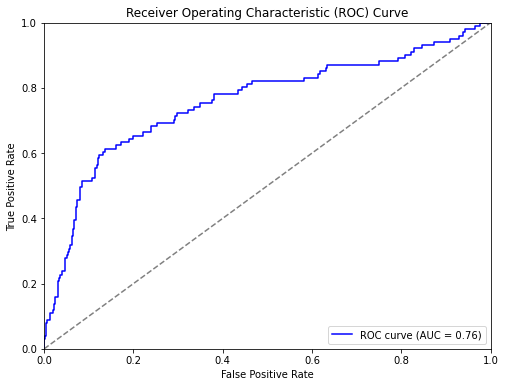

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Features used total calls, total minutes, total charges and international plan

In [31]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = data[['total calls', 'total minutes','total charges','international plan']]
y = data['churn']

# Separate numerical and categorical features
numerical_features = ['total calls', 'total minutes']
categorical_features = ['international plan']

# Scale numerical features
scaler = StandardScaler()
X_num = X[numerical_features]
X_num_scaled = scaler.fit_transform(X_num)

# Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = X[categorical_features]
X_cat_encoded = encoder.fit_transform(X_cat)

# Combine scaled numerical features and encoded categorical features
X_processed = np.hstack([X_num_scaled, X_cat_encoded])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.99      0.92       566
        True       0.62      0.10      0.17       101

    accuracy                           0.85       667
   macro avg       0.74      0.54      0.55       667
weighted avg       0.82      0.85      0.81       667

Confusion Matrix:
 [[560   6]
 [ 91  10]]


The classification report indicates:

Non-Churners (False): The model performs very well at identifying non-churners, with a high precision of 0.86 and recall of 0.99, leading to an excellent F1-score of 0.92. This means the model accurately identifies almost all customers who are not likely to churn.

Churners (True): The model's performance in identifying churners is much weaker. Precision is 0.62, recall is only 0.10, and the F1-score is 0.17. This indicates that the model misses a significant number of churners, meaning it fails to identify most customers who are likely to leave.

Overall Accuracy: The model has an overall accuracy of 85%, which is good but somewhat misleading given the imbalance between classes. The high accuracy is driven primarily by the model’s strong performance on non-churners.

Macro Average: The macro average metrics reflect the performance across both classes, showing a balanced view but still highlighting weaker performance in identifying churners (recall of 0.54).

Weighted Average: The weighted average metrics adjust for class imbalance, giving a more nuanced view of performance with an F1-score of 0.81, suggesting better overall performance when considering class proportions.

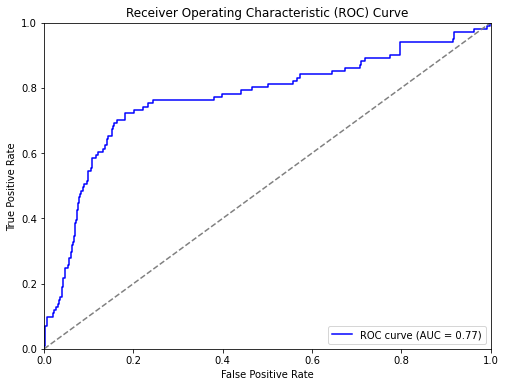

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Adding more features to the logistic regression model

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = data[['total calls', 'total minutes', 'total day charge', 'international plan', 'voice mail plan','state','area code']]
y = data['churn']

# Separate numerical and categorical features
numerical_features = ['total calls', 'total minutes','total day charge']
categorical_features = ['state', 'international plan', 'voice mail plan','area code']

# Scale numerical features
scaler = StandardScaler()
X_num = X[numerical_features]
X_num_scaled = scaler.fit_transform(X_num)

# Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = X[categorical_features]
X_cat_encoded = encoder.fit_transform(X_cat)

# Combine scaled numerical features and encoded categorical features
X_processed = np.hstack([X_num_scaled, X_cat_encoded])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.98      0.92       566
        True       0.54      0.14      0.22       101

    accuracy                           0.85       667
   macro avg       0.70      0.56      0.57       667
weighted avg       0.81      0.85      0.81       667

Confusion Matrix:
 [[554  12]
 [ 87  14]]


The classification report provides the following insights:

Non-Churners (False): The model is highly effective at predicting non-churners, with a precision of 0.86 and recall of 0.98. This results in a strong F1-score of 0.92, indicating that it accurately identifies almost all customers who are not likely to churn.

Churners (True): The model's performance in identifying churners is less effective. It has a precision of 0.54 and a recall of 0.14, leading to a low F1-score of 0.22. This suggests that the model misses a large proportion of actual churners, which could hinder targeted retention efforts.

Overall Accuracy: The model achieves an accuracy of 85%, reflecting a high rate of correct predictions overall. However, this metric may be misleading due to the imbalance between the classes.

Macro Average: The macro average metrics (precision: 0.70, recall: 0.56, F1-score: 0.57) provide a balanced view of performance across both classes but still highlight the weaker performance for churners.

Weighted Average: The weighted average metrics (precision: 0.81, recall: 0.85, F1-score: 0.81) adjust for class imbalance and offer a more balanced perspective of model performance.

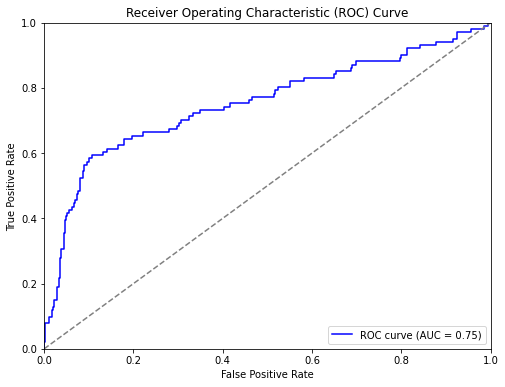

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities for the positive class (churn = 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Summary Report on Logistic Regression Model to Predict Churn

### Summary of Logistic Regression Model

**Strengths:**
- **Good at Identifying Non-Churners:** The logistic regression model performs well in predicting customers who are not likely to churn, with high precision and recall for the non-churn class. This means it is effective at ensuring that most customers who will stay are correctly classified.

**Limitations:**
- **Poor at Identifying Churners:** The model struggles significantly with identifying churners, exhibiting low precision and recall for the churn class. This means it misses a large portion of customers who are likely to churn, which can lead to missed opportunities for targeted retention strategies.

**Overall Assessment:**
- The logistic regression model is not ideal for applications where accurate identification of churners is crucial, as it fails to capture many churners. It is better suited for understanding and managing non-churners, but improvements or alternative models are needed to effectively address and reduce customer churn.

### Decision Tree Model

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define features and target variable
X = data[['total calls', 'total minutes', 'total day charge', 'international plan', 'voice mail plan']]
y = data['churn']

# Separate numerical and categorical features
numerical_features = ['total calls', 'total minutes', 'total day charge']
categorical_features = ['international plan', 'voice mail plan']

# Scale numerical features
scaler = StandardScaler()
X_num = X[numerical_features]
X_num_scaled = scaler.fit_transform(X_num)

# Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = X[categorical_features]
X_cat_encoded = encoder.fit_transform(X_cat)

# Combine scaled numerical features and encoded categorical features
X_processed = np.hstack([X_num_scaled, X_cat_encoded])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.90      0.90       566
        True       0.47      0.51      0.49       101

    accuracy                           0.84       667
   macro avg       0.69      0.71      0.70       667
weighted avg       0.85      0.84      0.84       667

Confusion Matrix:
 [[508  58]
 [ 49  52]]


In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define features and target variable
X = data[['total calls', 'total minutes', 'total day charge', 'international plan', 'voice mail plan','state']]
y = data['churn']

# Separate numerical and categorical features
numerical_features = ['total calls', 'total minutes', 'total day charge']
categorical_features = ['international plan', 'voice mail plan','state']

# Scale numerical features
scaler = StandardScaler()
X_num = X[numerical_features]
X_num_scaled = scaler.fit_transform(X_num)

# Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = X[categorical_features]
X_cat_encoded = encoder.fit_transform(X_cat)

# Combine scaled numerical features and encoded categorical features
X_processed = np.hstack([X_num_scaled, X_cat_encoded])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.90      0.91       566
        True       0.47      0.50      0.48       101

    accuracy                           0.84       667
   macro avg       0.69      0.70      0.69       667
weighted avg       0.84      0.84      0.84       667

Confusion Matrix:
 [[510  56]
 [ 51  50]]


### Summary Report of Decision Tree Model

**Strengths:**
- **Decent Balance for Non-Churners:** The Decision Tree model performs reasonably well with a precision of 0.91 and recall of 0.90 for non-churners, resulting in a solid F1-score of 0.90. This indicates that the model is effective at identifying customers who are not likely to churn.

**Limitations:**
- **Moderate Performance for Churners:** The model has lower precision (0.47) and recall (0.51) for churners, with an F1-score of 0.49. This suggests that it only moderately identifies customers who are likely to churn and may miss many potential churners.

**Overall Assessment:**
- **Overall Accuracy:** The model's accuracy of 84% is reasonable but can be misleading due to class imbalance. While it performs well on the non-churn class, its effectiveness at identifying churners is limited.
- **Macro Average:** The macro average metrics (precision: 0.69, recall: 0.71, F1-score: 0.70) indicate a more balanced view of performance across both classes but still reflect some weaknesses in churn prediction.
- **Weighted Average:** The weighted average metrics (precision: 0.85, recall: 0.84, F1-score: 0.84) provide a better overall perspective, considering class proportions.

**Conclusion:**
- The Decision Tree model offers a good balance for identifying non-churners and has reasonable performance overall. However, it has limitations in accurately predicting churners, which could impact the effectiveness of retention strategies. Improvements or alternative models might be necessary to enhance the identification of potential churners.

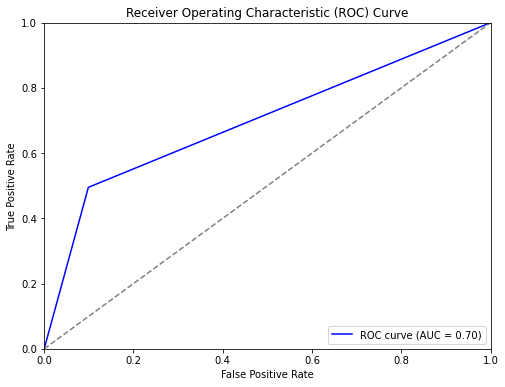

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities for the positive class (churn = 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Random Forest Classifier

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



# Drop columns 
data = data.drop(['phone number'], axis=1)

# 'state' and 'area code' are categorical features
data = pd.get_dummies(data, columns=['state','area code'], drop_first=True)

# Check for any non-numeric columns
print(data.dtypes)

# Define features and target variable
X = data.drop('churn', axis=1)  # Features
y = data['churn']               # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


account length             int64
international plan         int32
voice mail plan            int32
number vmail messages      int64
total day minutes        float64
                          ...   
state_WI                   uint8
state_WV                   uint8
state_WY                   uint8
area code_415              uint8
area code_510              uint8
Length: 73, dtype: object
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       566
        True       1.00      0.81      0.90       101

    accuracy                           0.97       667
   macro avg       0.98      0.91      0.94       667
weighted avg       0.97      0.97      0.97       667



### Summary of Random Forest Model

**Strengths:**
- **Excellent Performance for Non-Churners:** The Random Forest model excels at identifying non-churners, with a precision of 0.97 and recall of 1.00, leading to an F1-score of 0.98. This indicates a highly effective ability to correctly classify customers who are not likely to churn.
  
- **Strong Performance for Churners:** The model also performs well in identifying churners, achieving a precision of 1.00 and recall of 0.81, resulting in an F1-score of 0.90. This suggests that the model is very effective at detecting customers who are likely to churn.

**Overall Assessment:**
- **Accuracy:** The model has a high overall accuracy of 97%, reflecting its strong performance across both classes.
- **Macro Average:** The macro average metrics (precision: 0.98, recall: 0.91, F1-score: 0.94) indicate a well-balanced performance, showing that the model performs very well across both churn and non-churn classes.
- **Weighted Average:** The weighted average metrics (precision: 0.97, recall: 0.97, F1-score: 0.97) demonstrate that the model handles the class imbalance effectively and maintains high performance overall.

**Conclusion:**
- **Highly Effective Model:** The Random Forest model is highly effective in both predicting non-churners and churners, with strong precision, recall, and F1-scores for both classes. This makes it a robust choice for identifying and addressing customer churn, as it accurately captures most churners while maintaining high accuracy for non-churners.